<a href="https://colab.research.google.com/github/HarshitaViswanadham/Diabetes-Prediction-Using-ML/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import io
db = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

# Data Collection

In [ ]:
#Extracting data
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Our dataset dimesnions
db.shape

(768, 9)

In [ ]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#measuring the statistical values of the dataset range of each column
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Representation

Text(0, 0.5, 'Number of People')

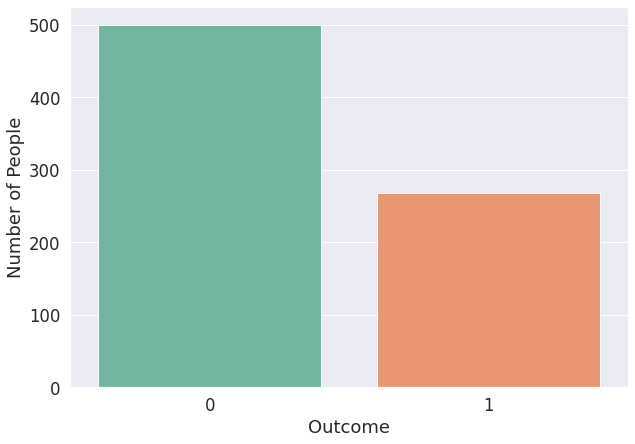

In [ ]:
#Counting values of outcomes having 0 or 1, 0 means non diabetic and 1 means diabetic
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x='Outcome',data=db,palette="Set2")
plt.ylabel('Number of People')

In [ ]:
db['Outcome'].value_counts()  

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
db.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
db.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Co-relation Matrix

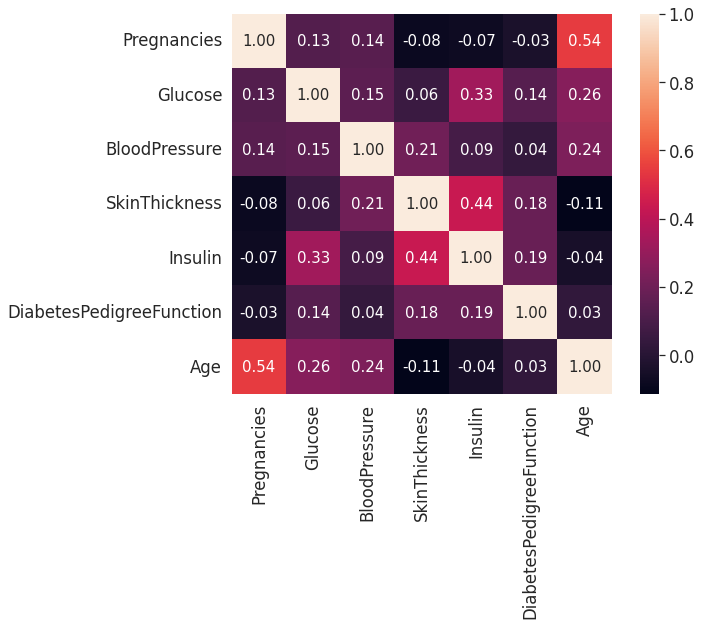

In [ ]:
#Corelation matrix to show correlation between two variables, 0.x means x% similar
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']
f,ax = plt.subplots(figsize = (10,7))
cm = np.corrcoef(db[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

In [ ]:
#Ex: correlation between Glucose and Outcome is 47% that means output depends majorly on Glucose
db_copy = db.copy(deep = True)

In [ ]:
#check for zero values in data
for i in db.columns:
    print(i,len(db[db[i]==0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [ ]:
#replace these zero values with NAN and later replace NAN with median
db_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = db_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(db_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Data Cleaning

In [ ]:
#Check if any null or empty data is present in dataset
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Feature matrix - Taking all our independent columns into single array and dependent values into another array
x=db.iloc[:,:-1].values  #Independent matrix
y=db.iloc[:,-1].values

In [ ]:
db['Outcome'].value_counts()  

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
x.shape

(768, 8)

In [ ]:
#refering to column 1 in dataset i.e pregnancies
x[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# Exploratory Data Analysis

Text(0.5, 1.0, 'Glucose')

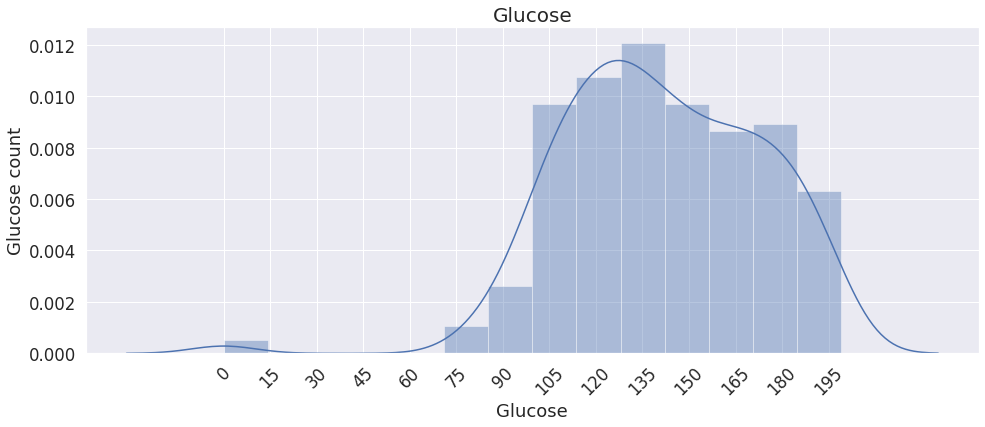

In [ ]:
#glucose for diabetic

fig = plt.figure(figsize =(16,6))
sns.distplot(db["Glucose"][db["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

Text(0.5, 1.0, 'Insulin')

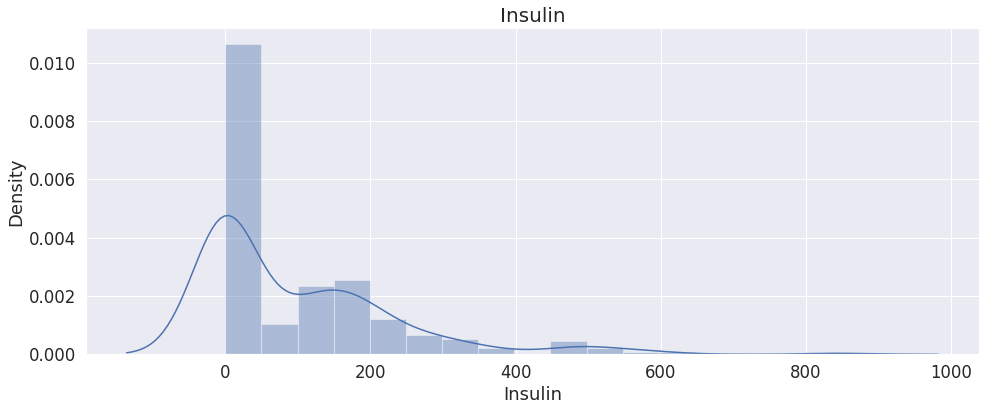

In [ ]:
#insulin for diabetic 

fig = plt.figure(figsize = (16,6))
sns.distplot(db["Insulin"][db["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 20)

Text(0.5, 1.0, 'BMI')

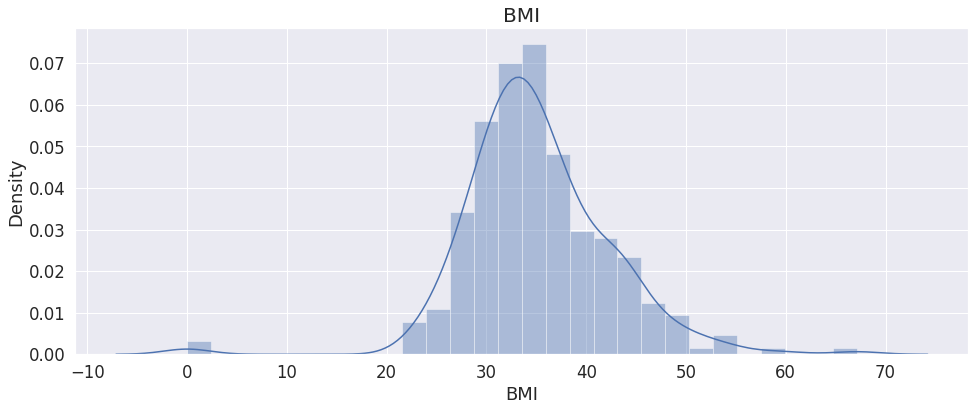

In [ ]:
#BMI for diabetic

fig = plt.figure(figsize =(16,6))
sns.distplot(db["BMI"][db["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

Text(0.5, 1.0, 'diabetespedigreefunction')

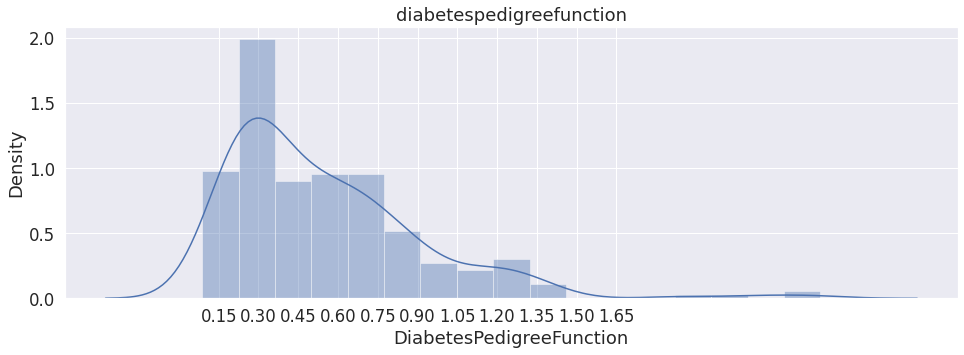

In [ ]:
#diabeticpedigreefunction for diabetic

fig = plt.figure(figsize = (16,5))
sns.distplot(db["DiabetesPedigreeFunction"][db["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

Text(0.5, 1.0, 'Age')

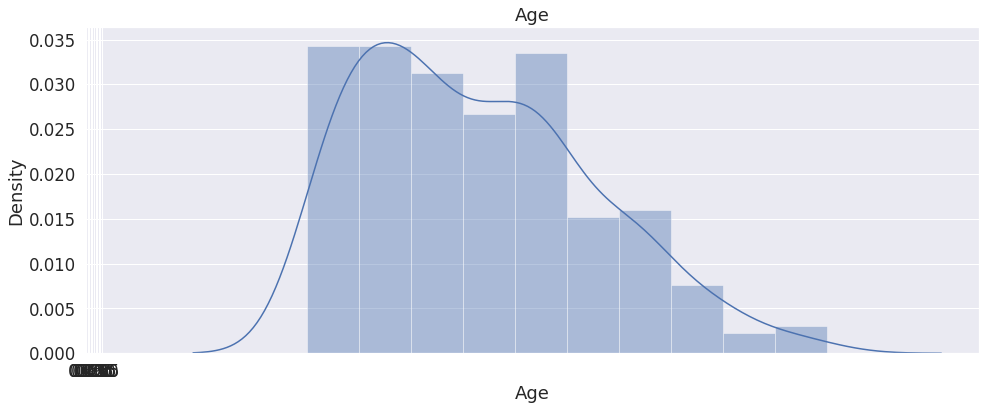

In [ ]:
#Age for diabetic

fig = plt.figure(figsize = (16,6))
sns.distplot(db["Age"][db["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

# Data pre-processing 

In [ ]:
x = db.drop(["Pregnancies","BloodPressure","SkinThickness","Outcome"],axis = 1)
y = db.iloc[:,-1]

In [ ]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#test_size 0.2 means for testing data 20% and training data 80%

In [ ]:
x_train.shape  #80% of original dataset (769,9) after removing unnecceasry data

(614, 5)

In [ ]:
x_test.shape   #20% of original dataset (769,9) after removing unnecceasry data

(154, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.91569367,  0.3736349 ,  0.37852648,  0.67740401,  1.69955804],
       [-0.75182191, -0.69965674, -0.50667229, -0.07049698, -0.96569189],
       [ 1.38763205,  5.09271083,  2.54094063, -0.11855487, -0.88240283],
       ...,
       [-0.84620959, -0.69965674, -0.94927168, -0.95656442, -1.04898095],
       [-1.12937261, -0.69965674, -0.26640405, -0.50001442,  0.11706589],
       [ 0.47521786, -0.69965674, -4.07275877,  0.52121586,  2.94889395]])

In [ ]:
x_test

array([[ 2.45735903e+00, -6.99656737e-01,  1.35224513e+00,
         2.78594417e+00, -9.65691892e-01],
       [-4.37196330e-01,  1.52162022e-01,  1.76195335e-01,
        -1.87638099e-01, -8.82402831e-01],
       [-1.41253563e+00, -6.99656737e-01,  2.26778122e-01,
        -2.26685139e-01, -7.15824710e-01],
       [ 1.41909460e+00,  7.91026091e-01, -8.10169011e-01,
         3.62024077e-01,  1.44969086e+00],
       [-3.11346097e-01, -6.99656737e-01, -9.61917372e-01,
         5.81288224e-01, -2.16090348e-01],
       [-1.25522284e+00, -3.58929234e-01, -7.09003437e-01,
        -5.51075932e-01, -7.99113771e-01],
       [ 9.78618790e-01,  7.56953341e-01,  2.52069515e-01,
         1.28113132e+00, -4.95122265e-02],
       [ 1.73372019e+00,  6.29180527e-01,  1.38258245e-01,
         2.06507574e+00,  1.53297992e+00],
       [ 1.92054834e-01,  1.64284485e+00, -5.69900773e-01,
         3.40468957e+00, -7.15824710e-01],
       [-5.63046563e-01,  9.18798905e-01,  6.94668901e-01,
        -4.27927575e-01

# Model Building - K Nearset Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =25, metric = 'minkowski') 
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
#Predicting the data
knn_y_pred = knn.predict(x_test)

In [ ]:
knn_y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

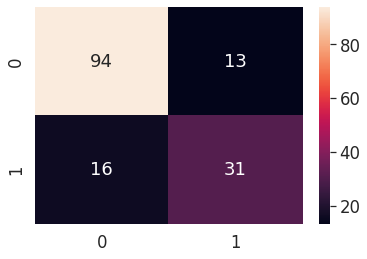

In [ ]:
# Confusion matrix - To check how many are correct or wrong 
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In [ ]:
# The above heatmap says 0,0 means true negative and 1,1 means true positive 
# and 0,1 means even person is negative but showing result positive
# and 1,0 means person is positive but shows negative so its danger so we need to accurate our model

In [ ]:
print("Correct:",sum(knn_y_pred==y_test))
print("Incorrect : ",sum(knn_y_pred != y_test))
print("Accuracy:",sum(knn_y_pred ==y_test)/len(knn_y_pred))

Correct: 125
Incorrect :  29
Accuracy: 0.8116883116883117


In [ ]:
#Verfying accuracy using inbuilt methods
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn_y_pred)

0.8116883116883117

# Simple Vector Machine

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_y_pred = svc.predict(x_test)

In [ ]:
svc_cm = confusion_matrix(y_test,svc_y_pred)
print(svc_cm)

[[96 11]
 [18 29]]


In [ ]:
print("Correct:",sum(svc_y_pred == y_test))
print("Incorrect : ",sum(svc_y_pred != y_test))
print("Accuracy:",sum(svc_y_pred ==y_test)/len(knn_y_pred))

Correct: 125
Incorrect :  29
Accuracy: 0.8116883116883117


# Naive Bias

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_y_pred =nb_classifier.predict(x_test)


In [ ]:
nb_cm = confusion_matrix(nb_y_pred,y_test)
print(nb_cm)

[[94 21]
 [13 26]]


In [ ]:
print("Correct:",sum(nb_y_pred == y_test))
print("Incorrect : ",sum(nb_y_pred != y_test))
print("Accuracy:",sum(nb_y_pred ==y_test)/len(nb_y_pred))

Correct: 120
Incorrect :  34
Accuracy: 0.7792207792207793


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_y_pred = rf_classifier.predict(x_test)

In [ ]:
rf_cm = confusion_matrix(rf_y_pred, y_test)
print(rf_cm)

[[91 17]
 [16 30]]


In [ ]:
print("Correct: ",sum(rf_y_pred == y_test))
print("Incorrect: ",sum(rf_y_pred != y_test))
print("Accuracy: ",sum(rf_y_pred == y_test)/len(rf_y_pred))

Correct:  121
Incorrect:  33
Accuracy:  0.7857142857142857
